## Initializing and Loading Data

In [33]:
file_location = "../Datasets/TMDB_movie_dataset_v11.csv"

In [34]:
import pandas as pd
import numpy as np

In [35]:
backup = pd.read_csv(file_location)

### Backup

In [36]:
data = backup.copy(deep=True)

## Initial Data Cleaning

In [37]:
initial = len(data)
before = initial
initial

1140108

### Getting rid of duplicate rows

In [38]:
data = data.drop_duplicates()
after = len(data)
print(f"Removed {(before - after)} duplicate rows. {after} rows left.")
before = after

Removed 368 duplicate rows. 1139740 rows left.


### Removing unreleased movies

The status column shows what stage of production the movie is in. We are only concerned with movies that have been released.

In [39]:
data.status.value_counts()

status
Released           1113554
In Production        10491
Post Production       8218
Planned               6812
Rumored                361
Canceled               304
Name: count, dtype: int64

Getting rid of unreleased movies:

In [40]:
data = data[data['status'] == "Released"]
after = len(data)
print(f"Removed {before - after} unreleased movies. {after} rows left.")
before = after

Removed 26186 unreleased movies. 1113554 rows left.



The release date of some rows are in the future, even though they are marked as `'Released'`. `release_date` is currently an `object` type and needs to be converted to a `datetime` type to be handled.

In [41]:
data['release_date'] = pd.to_datetime(data['release_date'])
data.release_date.describe()

count                           942709
mean     1999-12-19 06:00:05.476133120
min                1800-01-01 00:00:00
25%                1989-02-01 00:00:00
50%                2010-10-06 00:00:00
75%                2018-11-29 00:00:00
max                2061-12-07 00:00:00
Name: release_date, dtype: object

Dropping all movies with a release date in the future:

In [42]:
from datetime import date
today = pd.to_datetime(date.today())
data = data[data['release_date'] < today]
after = len(data)
print(f"Removed {before - after} future movies. {after} rows left.")
before = after

Removed 171022 future movies. 942532 rows left.


In [43]:
data.release_date.describe()

count                           942532
mean     1999-12-17 11:16:57.254798720
min                1800-01-01 00:00:00
25%                1989-01-29 00:00:00
50%                2010-10-04 00:00:00
75%                2018-11-28 00:00:00
max                2024-11-29 00:00:00
Name: release_date, dtype: object

Now the status column can be dropped.

In [44]:
data = data.drop(columns='status')
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

### Removing porn

The `adult` column designates if a row is an adult film. These will be dropped:

In [45]:
data = data[data['adult'] == False]
after = len(data)
print(f"Removed {before - after} adult films. {after} rows left.")
before = after

Removed 94597 adult films. 847935 rows left.


### Getting rid of duplicate IDs

In [46]:
print(f"There are {before - data.id.nunique()} rows with a repeated id.")

There are 7 rows with a repeated id.


Lower indexed entries are more up-to-date and more complete. Removing rows with duplicated IDs, only keeping the first occurance.

In [47]:
data = data.drop_duplicates(subset=['id'], keep='first')
after = len(data)
print(f"Removed {before - after} duplicate IDs. {after} rows left.")
before = after

Removed 7 duplicate IDs. 847928 rows left.


In [48]:
data.id.nunique()

847928

### Dropping unusable columns

Checking columns:

In [49]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'keywords'],
      dtype='object')

In [50]:
data[['backdrop_path', 'homepage', 'poster_path']].describe()

,backdrop_path,homepage,poster_path
count,259844,102245,635043
unique,257685,96471,631487
top,/3CxwYgqGtJ6UEGfWUT0gMYCIlFP.jpg,https://animation.geidai.ac.jp,/wtoKLMm4UvkwvcSwO3XWcs1gJuF.jpg
freq,157,147,54


The `backdrop_path`, `homepage`, and `poster_path` columns do not contain any useful data. These can be dropped.

In [51]:
data = data.drop(columns=['backdrop_path', 'homepage', 'poster_path'])
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

## Analyzing Columns

In [52]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'release_date', 'revenue',
       'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

### `title`

In [53]:
data.title.describe()

count     847924
unique    729266
top         Home
freq         130
Name: title, dtype: object

In [54]:
data['title'].sample(5)

904804     Buakaw - Boxer, Legend, Legacy
175150               The World Will Shake
704365                    Sporting Dreams
1092161               The Stars & Thunder
685905        Fairy Tale About Friendship
Name: title, dtype: object

### `vote_average`

In [55]:
data.vote_average.describe()

count    847928.000000
mean          2.286612
std           3.141303
min           0.000000
25%           0.000000
50%           0.000000
75%           5.342250
max          10.000000
Name: vote_average, dtype: float64

<Axes: ylabel='Frequency'>

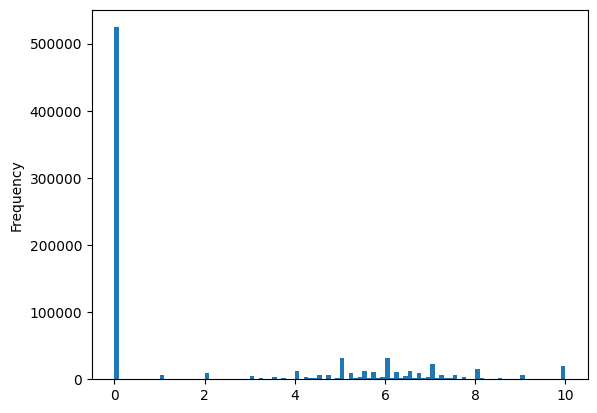

In [56]:
data.vote_average.plot.hist(bins=100)

There are an overwhelmingly large amount of $0.0$ vote averages. This is because they have $0$ `vote_count`. It's inappropriate to consider a movie with no votes to be $0.0$ on a $1\text{-}10$ scale that does not permit $0$. These should be replaced with `NaN`.

<Axes: ylabel='Frequency'>

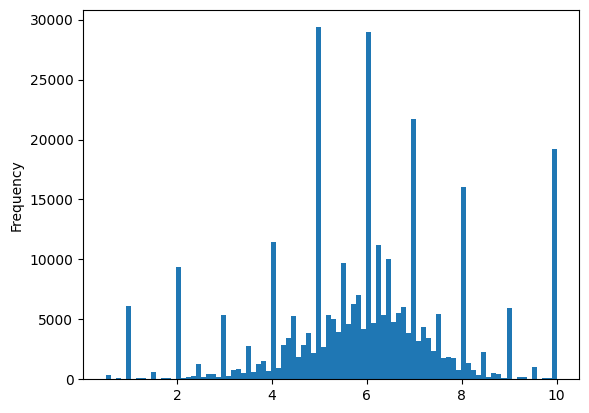

In [57]:
data.vote_average.replace(0, np.nan, inplace=True)
data.vote_average.plot.hist(bins=90)

In [58]:
scoredNoVotes = data.query('vote_count == 0 and vote_average != 0')
print(f"Amount of movies with no votes but have a vote average anyway: {len(scoredNoVotes)}")
scoredNoVotes.sample()

Amount of movies with no votes but have a vote average anyway: 524003


,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
426079,1100597,Doc Holliday,NaN,0,2023-03-01,0,0,False,0,tt21340016,en,Doc Holliday,Doc Holliday runs a small dental practice in r...,1.547,"Before Tombstone, he was... The Doc.",Western,"B22 Films, ITN Distribution",United States of America,English,NaN


There are some movies with $0$ `vote_count` but with a real `vote_average`.

### `vote_count`

In [59]:
data.vote_count.describe()

count    847928.000000
mean         25.244708
std         368.552200
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       34495.000000
Name: vote_count, dtype: float64

<Axes: ylabel='Frequency'>

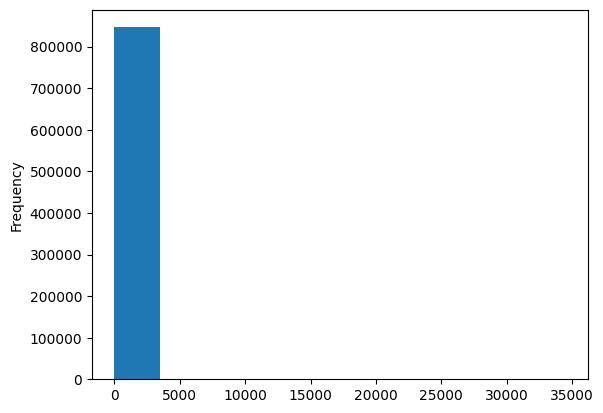

In [60]:
data.vote_count.plot.hist()

Most movies only have a handful of votes, while others can have tens of thousands.

### `release_date`

In [61]:
type(data['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: >

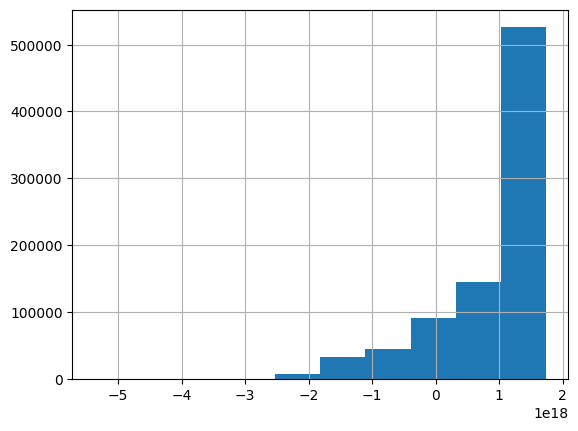

In [62]:
pd.to_numeric(data['release_date']).hist()

As expected the majority of movies are recent.

In [63]:
data[data['release_date'] == data['release_date'].min()]

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
583141,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0,1800-01-01,100000000,0,False,0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.6,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN


There are movies with improperly recorded dates.

In [64]:
data[data['release_date'] < pd.to_datetime('1900-01-01')].sort_values('release_date').head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
583141,1294302,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0,1800-01-01,100000000,0,False,0,NaN,he,בראול סטארס בחיים האמיתיים-אלון קאט,NaN,0.600,NaN,"Horror, Drama, Thriller, Mystery, War",Salty Fish,NaN,NaN,NaN
567812,1233885,A Farsa de Inês Pereira,NaN,0,1800-09-11,0,56,False,0,NaN,pt,A Farsa de Inês Pereira,The farsades of ines pereira by the goat of my...,0.600,NaN,NaN,NaN,NaN,Portuguese,NaN
540414,1314804,Kaskisavun mailta,NaN,0,1837-10-29,0,14,False,0,NaN,en,Kaskisavun mailta,Finnish short documentary,0.651,NaN,NaN,NaN,Finland,Finnish,NaN
611979,1256924,Felix Nadar Spinning in his Chair,NaN,0,1865-01-01,0,1,False,0,NaN,en,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.000,The frames that spun!,NaN,NaN,NaN,NaN,NaN
534500,1244969,Felix Nadar Spinning in his Chair,NaN,0,1865-01-01,0,1,False,0,tt31150469,fr,Felix Nadar Spinning in his Chair,Felix Nadar Spinning in his Chair,0.600,NaN,Documentary,Paris Nadar Studio,NaN,No Language,NaN


Luckily there are only a handful of these. The first legitimate film is in 1865, anything claiming to be older will be removed.

In [65]:
data = data[data['release_date'] >= pd.to_datetime('1865-01-01')]

### `revenue`

In [66]:
data.revenue.describe()

count    8.479250e+05
mean     8.733779e+05
std      1.958273e+07
min     -1.200000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+09
Name: revenue, dtype: float64

In [67]:
data.revenue.info()

<class 'pandas.core.series.Series'>
Index: 847925 entries, 0 to 1140105
Series name: revenue
Non-Null Count   Dtype
--------------   -----
847925 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


In [68]:
revenue_sorted = data.sort_values('revenue')
revenue_sorted.head()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
196266,339294,Some Bears,7.0,2,2013-05-15,-12,8,False,12,NaN,en,Some Bears,A young man slips into a world of delusion aft...,0.6,"Bears, known in the wild for their cuddliness",NaN,NaN,United States of America,English,NaN
1140104,734804,Studio Moments,NaN,0,2020-01-01,0,8,False,0,NaN,en,Studio Moments,"A ""moving image"" work by Richard Garet with mu...",0.6,NaN,NaN,NaN,NaN,NaN,NaN
1118602,727492,The Bronze Horseman,NaN,0,2016-03-31,0,0,False,0,NaN,en,The Bronze Horseman,This fantasy ballet is based on Pushkin’s poem...,0.6,NaN,NaN,Mariinsky Theatre,NaN,NaN,NaN
1118603,727493,The Little Humpbacked Horse,NaN,0,2014-08-05,0,0,False,0,NaN,en,The Little Humpbacked Horse,The Little Humpbacked Horse is based on a Russ...,0.6,NaN,NaN,Mariinsky Theatre,NaN,NaN,NaN
1118605,727496,Teeth,NaN,0,2017-10-07,0,71,False,0,tt7535280,ro,Dintii,A couple of thiefs from a battlefield have a s...,0.6,NaN,Drama,NaN,Romania,Romanian,NaN


In [69]:
revenue_sorted.tail()

,id,title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
282,76600,Avatar: The Way of Water,7.654,9830,2022-12-14,2320250281,192,False,460000000,tt1630029,en,Avatar: The Way of Water,Set more than a decade after the events of the...,241.285,Return to Pandora.,"Science Fiction, Adventure, Action","20th Century Studios, Lightstorm Entertainment",United States of America,English,"dying and death, loss of loved one, alien life..."
15,299534,Avengers: Endgame,8.263,23857,2019-04-24,2800000000,181,False,356000000,tt4154796,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,91.756,Avenge the fallen.,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa","superhero, time travel, space travel, time mac..."
3,19995,Avatar,7.573,29815,2009-12-15,2923706026,162,False,237000000,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
554324,1224207,Adventures in Bora Bora,NaN,0,2023-08-23,3000000000,5,False,800000000,NaN,en,Adventures in Bora Bora,"The adventures in Bora Bora, is an astonishing...",0.000,(English),"Horror, War",NaN,NaN,English,NaN
230038,1270893,TikTok Rizz Party,10.000,1,2024-04-01,3000000000,180,False,250000000,NaN,en,TikTok Rizz Party,"a band of brothers, torn apart by the constant...",0.000,NaN,"Drama, Comedy",Warner Bros.,United States of America,NaN,"party, tiktok, rizz"


Most films have no revenue, but there are many highly grossing films.

### `runtime`

In [70]:
data.runtime.describe()

count    847925.000000
mean         48.082085
std          59.384246
min           0.000000
25%           3.000000
50%          30.000000
75%          88.000000
max       14400.000000
Name: runtime, dtype: float64

In [71]:
data.runtime.info()

<class 'pandas.core.series.Series'>
Index: 847925 entries, 0 to 1140105
Series name: runtime
Non-Null Count   Dtype
--------------   -----
847925 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


In [72]:
zero_runtime = data[data['runtime'] == 0]
print(f"There are {len(zero_runtime)} movies with zero runtime.")

There are 185996 movies with zero runtime.


Many movies have their runtime listed as zero. These will be considered missing data.

In [73]:
data.runtime = data.runtime.replace(0, np.nan)

<Axes: ylabel='Frequency'>

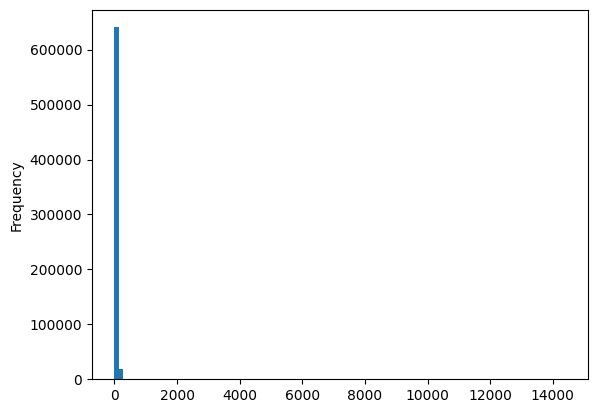

In [74]:
data.runtime.plot.hist(bins=100)

There are a few strong outliers.

<Axes: ylabel='Frequency'>

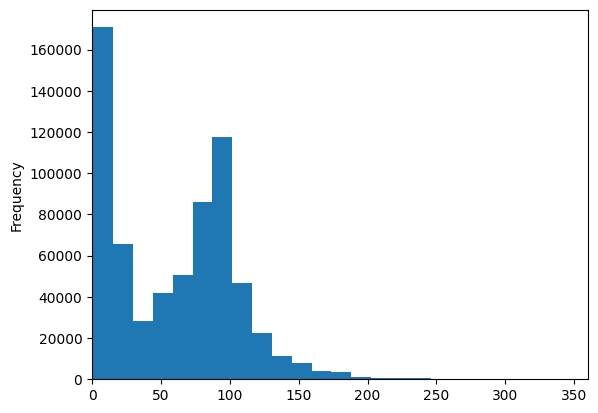

In [75]:
data.runtime.plot.hist(bins=1000, xlim=(0, 360))

### `budget`

In [76]:
data.budget.describe()

count    8.479250e+05
mean     3.324472e+05
std      5.222808e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.880000e+08
Name: budget, dtype: float64

In [77]:
data.budget.info()

<class 'pandas.core.series.Series'>
Index: 847925 entries, 0 to 1140105
Series name: budget
Non-Null Count   Dtype
--------------   -----
847925 non-null  int64
dtypes: int64(1)
memory usage: 12.9 MB


## Exporting

In [78]:
data.to_csv('../Datasets/clean.csv')